In [1]:
"""
Usage details:
Step 1: Get preprocessed data using get_data.sh script.
    a. Verify that all the files in a particular directory have valid content.
       If some file doesn't have complete data then the script will output empty data.
    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if
       the results are for shared llc, 0 otherwise. This has to be done for each file.
       for FILE in *; do get_data.sh file.txt num_cores is_shared; done
    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" 
    for different file_names. Move the results in the desired place.
Step 2:
    a. List the two data points to compare and corresponding directories.
    b. Get the processed_data for each file for each of the two data points.
       Signature : process_file(file, num_core)
       Data point structure:
       For each data point(e.g."shared", "sliced"):
       [ [(sim_inst_count, cpu_data)] for each file in a data point]
       cpu_data structure
       [(global_mpki, ipc, cache_data) for each cpu]
       cache_data structure:
       [[total_access, hit, miss, mpki] for each cache] : 4x4
    c. Use the processed data as needed.
"""

'\nUsage details:\nStep 1: Get preprocessed data using get_data.sh script.\n    a. Verify that all the files in a particular directory have valid content.\n       If some file doesn\'t have complete data then the script will output empty data.\n    b. Run the script like "get_data.sh file.txt num_cores is_shared". is_shared is 1 if\n       the results are for shared llc, 0 otherwise. This has to be done for each file.\n       for FILE in *; do get_data.sh file.txt num_cores is_shared; done\n    c. The above step will generate file_preprocessed.txt in a folder named "preprocessed_results" \n    for different file_names. Move the results in the desired place.\nStep 2:\n    a. List the two data points to compare and corresponding directories.\n    b. Get the processed_data for each file for each of the two data points.\n       Signature : process_file(file, num_core)\n       Data point structure:\n       For each data point(e.g."shared", "sliced"):\n       [ [(sim_inst_count, cpu_data)] f

In [2]:
def add(l1,l2):
    temp = []
    for i in range(0,len(l1)):
        temp.append(l1[i]+l2[i])
    return temp

In [3]:
def find_labels1(x):
    temp = []
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[0] + '(' +  a + ')')
        
    return temp

In [4]:
def find_labels2(x):
    
    temp = [] 
    for i in range(len(x)):
        a = x[i].split('_')[0]
        temp.append(a.split('-')[1] + '(' +  a + ')')
        
    return temp

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import os

In [8]:
os.listdir()

['preprocess_result_sliced',
 'preprocess_result_shared',
 'process_data2.py',
 '.ipynb_checkpoints',
 'plot_results.ipynb',
 'process_data1.py']

In [9]:
from process_data2 import process_file2
from process_data1 import process_file1


In [10]:
shared_dir = "preprocess_result_shared"
sliced_dir = "preprocess_result_sliced"

"""
The processed files must be defined manually like :
shared_preprocessed_files = ["file1.txt", "file2.txt", ...].

The result will be in the same order as the files.
""" 

shared_preprocessed_files = os.listdir(shared_dir)

sliced_preprocessed_files = os.listdir(sliced_dir)

In [11]:
shared_preprocessed_files.sort()

In [12]:
shared_preprocessed_files

['bwaves-omen_shared_preprocessed.txt',
 'gcc-perl_shared_preprocessed.txt',
 'mcf-cactu_shared_preprocessed.txt']

In [13]:
sliced_preprocessed_files.sort()

In [14]:
sliced_preprocessed_files

['bwaves-omen_i5_preprocessed.txt',
 'gcc-perl_i5_preprocessed.txt',
 'mcf-cactu_i5_preprocessed.txt']

In [15]:
shared_preprocessed_result = []
for file in shared_preprocessed_files:
    file_path = os.path.join(shared_dir, file)
    sim_inst_count, cpu_data = process_file2(file_path, 2)
    shared_preprocessed_result.append((sim_inst_count, cpu_data))
shared_preprocessed_result

[(100000000,
  [(46.3177,
    1.00461,
    [[6489066, 4761084, 1727982, 17.27982],
     [12, 5, 7, 7e-05],
     [1727993, 113, 1727880, 17.2788],
     [1727881, 278, 1727603, 17.27603]]),
   (12.0475,
    0.35996,
    [[35951882, 34081234, 1870648, 18.70648],
     [9405691, 9355523, 50168, 0.50168],
     [2829602, 1460388, 1369214, 13.69214],
     [2037392, 808223, 1229169, 12.29169]])]),
 (100000000,
  [(19.5668,
    0.28885,
    [[22591323, 20179734, 2411589, 24.11589],
     [0, 0, 0, 0],
     [2417918, 637518, 1780400, 17.804],
     [1782861, 5316, 1777545, 17.77545]]),
   (6.36664,
    0.982804,
    [[32406518, 32033780, 372738, 3.72738],
     [7883897, 7330824, 553073, 5.53073],
     [1019594, 844809, 174785, 1.74785],
     [207503, 56832, 150671, 1.50671]])]),
 (100000000,
  [(2.29487,
    0.109667,
    [[46680031, 41807812, 4872219, 48.72219],
     [6748169, 6748169, 0, 0.0],
     [5389693, 589556, 4800137, 48.00137],
     [5261118, 448438, 4812680, 48.1268]]),
   (0.00356941,
 

In [16]:
sliced_preprocessed_result = []
for file in sliced_preprocessed_files:
    file_path = os.path.join(sliced_dir, file)
    sim_inst_count, cpu_data = process_file1(file_path, 2)
    sliced_preprocessed_result.append((sim_inst_count, cpu_data))
sliced_preprocessed_result

46.295
12.0475
19.5715
6.39783
2.29487
0.00356529


[(100000000,
  [(46.295,
    0.990625,
    [[6491000, 4763024, 1727976, 17.27976],
     [10, 3, 7, 7e-05],
     [1727987, 110, 1727877, 17.27877],
     [867442, 116, 867326, 8.67326],
     [860436, 164, 860272, 8.60272]]),
   (12.0475,
    0.351368,
    [[35782979, 33912344, 1870635, 18.70635],
     [9455225, 9404997, 50228, 0.50228],
     [2828758, 1459399, 1369359, 13.69359],
     [1020231, 253541, 766690, 7.6669],
     [1016582, 249788, 766794, 7.66794]])]),
 (100000000,
  [(19.5715,
    0.288214,
    [[22590736, 20179085, 2411651, 24.11651],
     [0, 0, 0, 0],
     [2417982, 637554, 1780428, 17.80428],
     [893828, 2241, 891587, 8.91587],
     [889060, 1803, 887257, 8.87257]]),
   (6.39783,
    0.974082,
    [[32254536, 31881792, 372744, 3.72744],
     [7898257, 7344863, 553394, 5.53394],
     [1019942, 840143, 179799, 1.79799],
     [105761, 23245, 82516, 0.82516],
     [106985, 24009, 82976, 0.82976]])]),
 (100000000,
  [(2.29487,
    0.109346,
    [[46641131, 41768933, 4872198,

In [17]:
sliced = {'INST': 0}
shared = {'INST' : 0}

In [18]:
sliced_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC0_ACCESS', 'LLC0_MISS','LLC0_HIT' , 'LLC1_ACCESS', 'LLC1_MISS','LLC1_HIT','LLC1_MPKI','LLC0_MPKI','L2_MPKI'  }
shared_fields = {'MPKI','L2_ACCESS', 'L2_MISS', 'L2_HIT', 'LLC_ACCESS', 'LLC_MISS','LLC_HIT','L2_MPKI', 'LLC_MPKI'  }

In [19]:
sliced_preprocessed_result[0][0]

100000000

In [20]:
for i in sliced_fields:
    
    sliced['C0_'+i] = 0
    sliced['C1_'+i] = 0
    
for i in shared_fields:
    
    shared['C0_'+i] = 0
    shared['C1_'+i] = 0

In [21]:
def fun(dic, label):
    temp = []
    
    for i in range(len(dic)):
        temp.append(dic[i][label])
        
    return temp

In [22]:
len(sliced_preprocessed_result)

3

In [23]:
sliced_lis = []
shared_lis = []
for i in range(0,len(sliced_preprocessed_result)):
    temp1 = sliced.copy()
    temp2 = shared.copy()
    sliced_lis.append(temp1)
    shared_lis.append(temp2)

In [24]:
shared_lis

[{'INST': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0},
 {'INST': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 0,
  'C0_LLC_ACCESS': 0,
  'C1_LLC_ACCESS': 0,
  'C0_L2_MISS': 0,
  'C1_L2_MISS': 0},
 {'INST': 0,
  'C0_L2_MPKI': 0,
  'C1_L2_MPKI': 0,
  'C0_LLC_MISS': 0,
  'C1_LLC_MISS': 0,
  'C0_L2_HIT': 0,
  'C1_L2_HIT': 0,
  'C0_L2_ACCESS': 0,
  'C1_L2_ACCESS': 0,
  'C0_LLC_HIT': 0,
  'C1_LLC_HIT': 0,
  'C0_MPKI': 0,
  'C1_MPKI': 0,
  'C0_LLC_MPKI': 0,
  'C1_LLC_MPKI': 

In [25]:
for i in range(0,len(sliced_lis)):
    sliced_lis[i]['INST'] =  sliced_preprocessed_result[i][0]
    sliced_lis[i]['C0_L2_MISS'] = sliced_preprocessed_result[i][1][0][2][2][2]
    sliced_lis[i]['C1_L2_MISS']=  sliced_preprocessed_result[i][1][1][2][2][2]
    sliced_lis[i]['C0_L2_HIT'] =  sliced_preprocessed_result[i][1][0][2][2][1]
    sliced_lis[i]['C1_L2_HIT'] =  sliced_preprocessed_result[i][1][1][2][2][1]
    sliced_lis[i]['C0_LLC1_MISS']= sliced_preprocessed_result[i][1][0][2][4][2]
    sliced_lis[i]['C1_LLC1_MISS'] =  sliced_preprocessed_result[i][1][1][2][4][2]
    sliced_lis[i]['C0_LLC0_ACCESS'] = sliced_preprocessed_result[i][1][0][2][3][0]
    sliced_lis[i]['C1_LLC0_ACCESS'] =  sliced_preprocessed_result[i][1][1][2][3][0]
    sliced_lis[i]['C0_LLC1_HIT'] = sliced_preprocessed_result[i][1][0][2][4][1]
    sliced_lis[i]['C1_LLC1_HIT'] = sliced_preprocessed_result[i][1][1][2][4][1]
    sliced_lis[i]['C0_IPC']=  sliced_preprocessed_result[i][1][0][1]
    sliced_lis[i]['C1_IPC'] = sliced_preprocessed_result[i][1][1][1]
    sliced_lis[i]['C0_MPKI']=  sliced_preprocessed_result[i][1][0][0]
    sliced_lis[i]['C1_MPKI'] = sliced_preprocessed_result[i][1][1][0]
    sliced_lis[i]['C0_LLC0_MISS'] = sliced_preprocessed_result[i][1][0][2][3][2]
    sliced_lis[i]['C1_LLC0_MISS'] = sliced_preprocessed_result[i][1][1][2][3][2]
    sliced_lis[i]['C0_LLC1_ACCESS'] = sliced_preprocessed_result[i][1][0][2][4][0]
    sliced_lis[i]['C1_LLC1_ACCESS'] =  sliced_preprocessed_result[i][1][1][2][4][0]
    sliced_lis[i]['C0_L2_ACCESS'] =  sliced_preprocessed_result[i][1][0][2][2][0]
    sliced_lis[i]['C1_L2_ACCESS'] =  sliced_preprocessed_result[i][1][1][2][2][0]
    sliced_lis[i]['C0_LLC0_HIT']  = sliced_preprocessed_result[i][1][0][2][3][1]
    sliced_lis[i]['C1_LLC0_HIT']  = sliced_preprocessed_result[i][1][1][2][3][1]
    sliced_lis[i]['C0_LLC1_MPKI'] = sliced_preprocessed_result[i][1][0][2][4][3]
    sliced_lis[i]['C1_LLC1_MPKI'] = sliced_preprocessed_result[i][1][1][2][4][3]
    sliced_lis[i]['C0_L2_MPKI'] =  sliced_preprocessed_result[i][1][0][2][2][3]
    sliced_lis[i]['C1_L2_MPKI'] =  sliced_preprocessed_result[i][1][1][2][2][3]

In [26]:
for i in range(0,len(shared_lis)):
    shared_lis[i]['INST'] =  shared_preprocessed_result[i][0]
    shared_lis[i]['C0_L2_MISS'] = shared_preprocessed_result[i][1][0][2][2][2]
    shared_lis[i]['C1_L2_MISS']=  shared_preprocessed_result[i][1][1][2][2][2]
    shared_lis[i]['C0_L2_HIT'] =  shared_preprocessed_result[i][1][0][2][2][1]
    shared_lis[i]['C1_L2_HIT'] =  shared_preprocessed_result[i][1][1][2][2][1]
    shared_lis[i]['C0_LLC_MISS']= shared_preprocessed_result[i][1][0][2][3][2]
    shared_lis[i]['C1_LLC_MISS'] =  shared_preprocessed_result[i][1][1][2][3][2]
    shared_lis[i]['C0_LLC_HIT'] = shared_preprocessed_result[i][1][0][2][3][1]
    shared_lis[i]['C1_LLC_HIT'] = shared_preprocessed_result[i][1][1][2][3][1]
    shared_lis[i]['C0_IPC']=  shared_preprocessed_result[i][1][0][1]
    shared_lis[i]['C1_IPC'] = shared_preprocessed_result[i][1][1][1]
    shared_lis[i]['C0_MPKI']=  shared_preprocessed_result[i][1][0][0]
    shared_lis[i]['C1_MPKI'] = shared_preprocessed_result[i][1][1][0]
    shared_lis[i]['C0_LLC_ACCESS'] = shared_preprocessed_result[i][1][0][2][3][0]
    shared_lis[i]['C1_LLC_ACCESS'] =  shared_preprocessed_result[i][1][1][2][3][0]
    shared_lis[i]['C0_L2_ACCESS'] =  shared_preprocessed_result[i][1][0][2][2][0]
    shared_lis[i]['C1_L2_ACCESS'] =  shared_preprocessed_result[i][1][1][2][2][0]
    shared_lis[i]['C0_LLC_MPKI'] = shared_preprocessed_result[i][1][0][2][3][3]
    shared_lis[i]['C1_LLC_MPKI'] = shared_preprocessed_result[i][1][1][2][3][3]
    shared_lis[i]['C0_L2_MPKI'] =  shared_preprocessed_result[i][1][0][2][2][3]
    shared_lis[i]['C1_L2_MPKI'] =  shared_preprocessed_result[i][1][1][2][2][3]

In [27]:
shared_lis

[{'INST': 100000000,
  'C0_L2_MPKI': 17.2788,
  'C1_L2_MPKI': 13.69214,
  'C0_LLC_MISS': 1727603,
  'C1_LLC_MISS': 1229169,
  'C0_L2_HIT': 113,
  'C1_L2_HIT': 1460388,
  'C0_L2_ACCESS': 1727993,
  'C1_L2_ACCESS': 2829602,
  'C0_LLC_HIT': 278,
  'C1_LLC_HIT': 808223,
  'C0_MPKI': 46.3177,
  'C1_MPKI': 12.0475,
  'C0_LLC_MPKI': 17.27603,
  'C1_LLC_MPKI': 12.29169,
  'C0_LLC_ACCESS': 1727881,
  'C1_LLC_ACCESS': 2037392,
  'C0_L2_MISS': 1727880,
  'C1_L2_MISS': 1369214,
  'C0_IPC': 1.00461,
  'C1_IPC': 0.35996},
 {'INST': 100000000,
  'C0_L2_MPKI': 17.804,
  'C1_L2_MPKI': 1.74785,
  'C0_LLC_MISS': 1777545,
  'C1_LLC_MISS': 150671,
  'C0_L2_HIT': 637518,
  'C1_L2_HIT': 844809,
  'C0_L2_ACCESS': 2417918,
  'C1_L2_ACCESS': 1019594,
  'C0_LLC_HIT': 5316,
  'C1_LLC_HIT': 56832,
  'C0_MPKI': 19.5668,
  'C1_MPKI': 6.36664,
  'C0_LLC_MPKI': 17.77545,
  'C1_LLC_MPKI': 1.50671,
  'C0_LLC_ACCESS': 1782861,
  'C1_LLC_ACCESS': 207503,
  'C0_L2_MISS': 1780400,
  'C1_L2_MISS': 174785,
  'C0_IPC': 0.28885

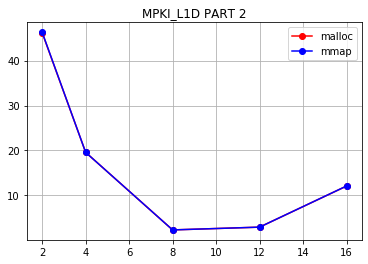

In [28]:
x=[2,4,8,12,16]
plt.title('MPKI_L1D PART 2')
plt.plot(x,fun(sliced_lis,'C0_MPKI'), 'r' ,marker='o',label="malloc")
plt.plot(x,fun(shared_lis,'C0_MPKI'), 'b' ,marker='o',label='mmap')
plt.grid()
plt.legend(loc='best')
plt.show()

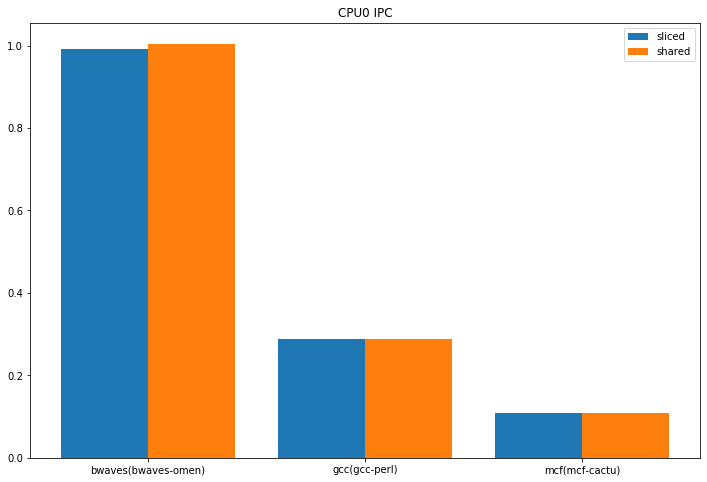

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
plt.title('CPU0 IPC')
# Note we add the `width` parameter now which sets the width of each bar.
a = [x - 0.0 for x in fun(sliced_lis,'C0_IPC')]
b1 = ax.bar(x, a, width=bar_width,label='sliced' )

# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(shared_lis,'C0_IPC'), width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
#ax.set_xticklabels(["mcf (mcf-wrf) ", "mcf (mcf-cuctu)", "gcc(gcc-perl)", "bwaves(bwaves-omen)"])
ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

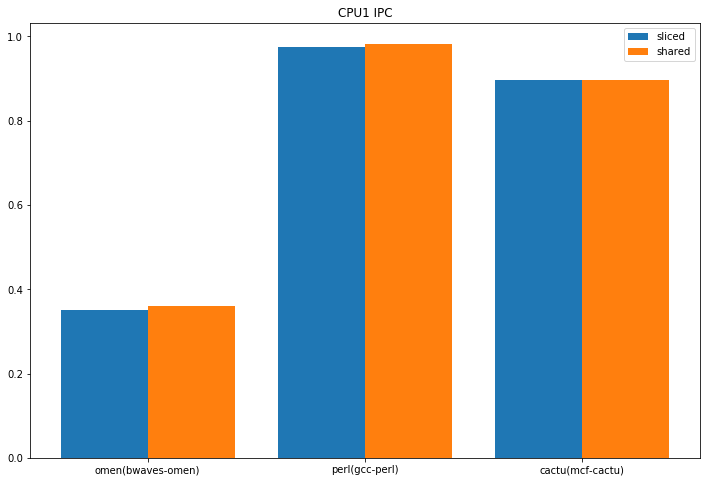

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)
plt.title('CPU1 IPC')
# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
a = [x - 0.0 for x in fun(sliced_lis,'C1_IPC')]
b1 = ax.bar(x, a, width=bar_width,label='sliced' )

# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, fun(shared_lis,'C1_IPC'), width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
#ax.set_xticklabels(["mcf (mcf-wrf) ", "mcf (mcf-cuctu)", "gcc(gcc-perl)", "bwaves(bwaves-omen)"])
ax.set_xticklabels(find_labels2(shared_preprocessed_files))
# Add legend.
ax.legend()

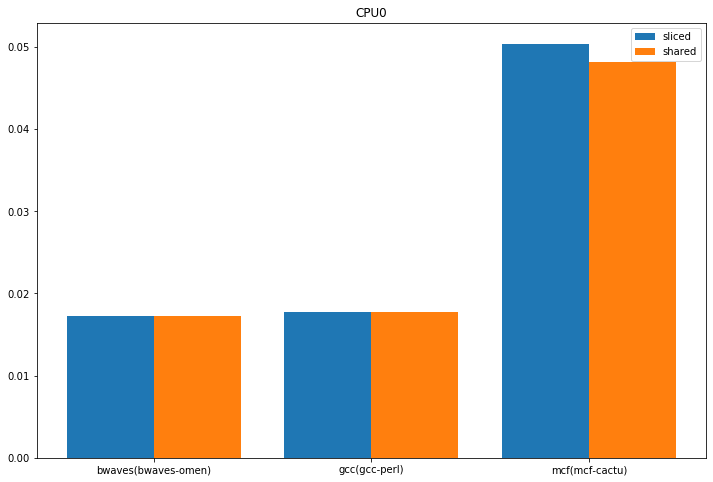

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)
plt.title('CPU0')
# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
res = [i / j for i, j in zip(add(fun(sliced_lis,'C0_LLC1_MISS') ,fun(sliced_lis,'C0_LLC0_MISS') ), fun(sliced_lis,'INST'))]
# Note we add the `width` parameter now which sets the width of each bar.

a = [x + 0.00 for x in res]
b1 = ax.bar(x, a, width=bar_width,label='sliced' )
# Same thing, but offset the x by the width of the bar.

res = [i / j for i, j in zip(fun(shared_lis,'C0_LLC_MISS'), fun(shared_lis,'INST'))]
#a = [x - 0.05 for x in res]
b2 = ax.bar(x + bar_width, res, width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)

ax.set_xticklabels(find_labels1(shared_preprocessed_files))
# Add legend.
ax.legend()

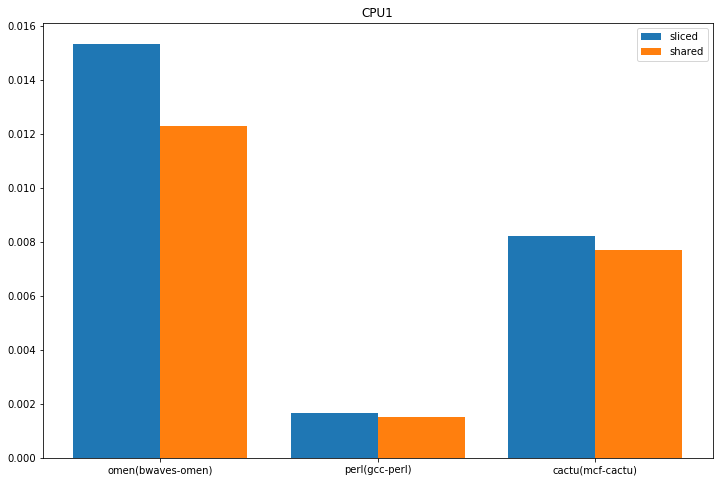

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(3)
plt.title('CPU1')
# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
res = [i / j for i, j in zip(add(fun(sliced_lis,'C1_LLC1_MISS') ,fun(sliced_lis,'C1_LLC0_MISS') ), fun(sliced_lis,'INST'))]
# Note we add the `width` parameter now which sets the width of each bar.

a = [x + 0.00 for x in res]
b1 = ax.bar(x, a, width=bar_width,label='sliced' )
# Same thing, but offset the x by the width of the bar.

res = [i / j for i, j in zip(fun(shared_lis,'C1_LLC_MISS'), fun(shared_lis,'INST'))]
#a = [x - 0.05 for x in res]
b2 = ax.bar(x + bar_width, res, width=bar_width, label='shared')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)

ax.set_xticklabels(find_labels2(shared_preprocessed_files))
# Add legend.
ax.legend()

In [115]:
shared_lis[0]['C0_L2_MPKI']

17.2788

In [148]:
x ="sas_ewd".split("_")[0]

In [149]:
x

'sas'